In [108]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [109]:

import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

%matplotlib inline
import seaborn as sns
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [110]:
import pandas as pd
import numpy as np

#Read Data

In [111]:
df=pd.read_csv('weather1.csv',index_col='obstime',parse_dates=True)
df = df.asfreq('D')
df=df.dropna()
print('Shape of data',df.shape)
df.head()
# Load the dataset with the correct datetime parsing

Shape of data (206, 5)


,tempr,ap,ws,wd,rh
obstime,,,,,
2015-11-01,-12.52,973.92,29.30,86.38,43.13
2015-11-02,-4.53,958.99,27.68,83.62,45.88
2015-11-03,-3.92,974.70,20.10,60.60,72.60
2015-11-04,-6.86,981.92,12.70,101.25,49.02
2015-11-05,-10.44,970.83,10.44,95.08,49.23


#Plot Your Data

In [112]:
pip install matplotlib


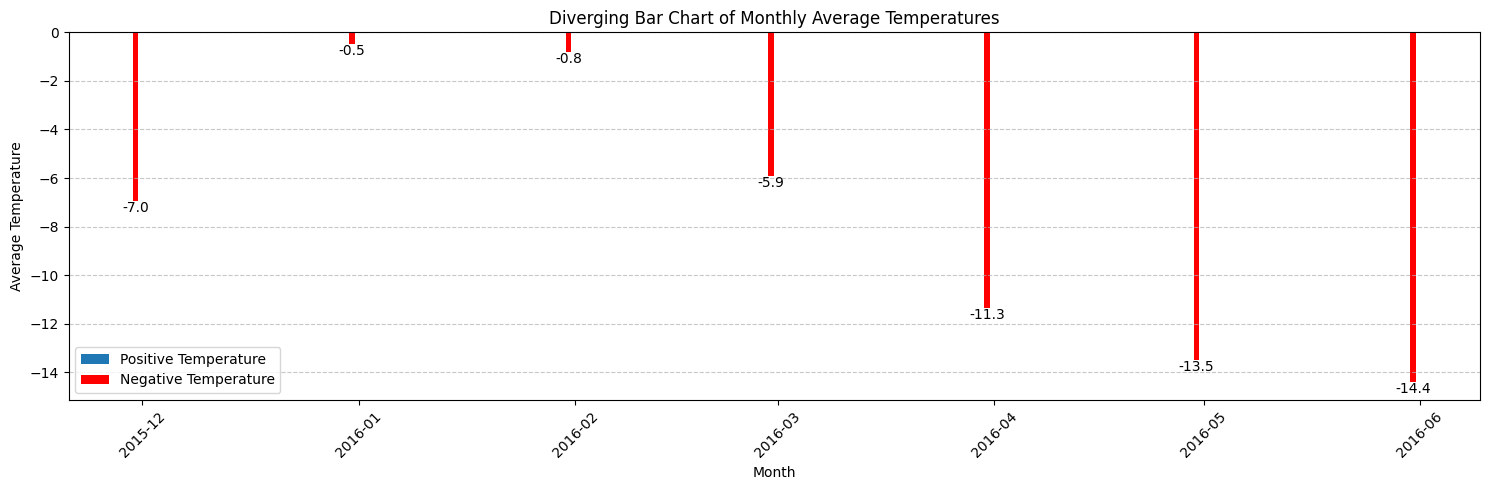

In [113]:
# // utp
import matplotlib.pyplot as plt
monthly_data = df['tempr'].resample('M').mean()

plt.figure(figsize=(15, 5))

# Separate the data into positive and negative
positive_data = monthly_data[monthly_data >= 0]
negative_data = monthly_data[monthly_data < 0]
# Plot bars for positive values
plt.bar(positive_data.index, positive_data, color='blue', label='Positive Temperature')

# Plot bars for negative values
plt.bar(negative_data.index, negative_data, color='red', label='Negative Temperature')

# Add labels for clarity
for idx, value in positive_data.items():
    plt.text(idx, value, f'{value:.1f}', ha='center', va='bottom', color='black')
for idx, value in negative_data.items():
    plt.text(idx, value, f'{value:.1f}', ha='center', va='top', color='black')

plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title('Diverging Bar Chart of Monthly Average Temperatures')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [114]:
# df['ap'].plot(figsize=(12,5))
     

In [115]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    # Determining rolling statistics
    rolling_window = 12
    MA = timeseries.rolling(window=rolling_window).mean()
    MSTD = timeseries.rolling(window=rolling_window).std()

    # Plot rolling statistics
    plt.figure(figsize=(15, 7))
    plt.plot(timeseries, color='blue', label='Original', linewidth=2)
    plt.plot(MA, color='red', label='Rolling Mean', linestyle='--', linewidth=2)
    plt.plot(MSTD, color='black', label='Rolling Std', linestyle='--', linewidth=2)
    plt.title('Rolling Mean & Standard Deviation')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.legend(loc='best')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Perform Dickey-Fuller test
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)


In [116]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        raise TypeError("Input should be a pandas Series.")
    
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        # Plot the time series
        y.plot(ax=ts_ax, color='blue')
        ts_ax.set_title('Time Series Plot')
        ts_ax.set_xlabel('Date')
        ts_ax.set_ylabel('Values')
        ts_ax.grid(True)

        # Perform Dickey-Fuller test and display p-value
        adf_result = sm.tsa.stattools.adfuller(y)
        p_value = adf_result[1]
        ts_ax.set_title(f'Time Series Analysis Plots\nDickey-Fuller: p={p_value:.5f}')
        
        # Plot ACF and PACF
        smt.graphics.tsa.plot_acf(y, lags=lags, ax=acf_ax)
        acf_ax.set_title('ACF Plot')
        acf_ax.grid(True)

        smt.graphics.tsa.plot_pacf(y, lags=lags, ax=pacf_ax)
        pacf_ax.set_title('PACF Plot')
        pacf_ax.grid(True)
        
        plt.tight_layout()
        plt.show()

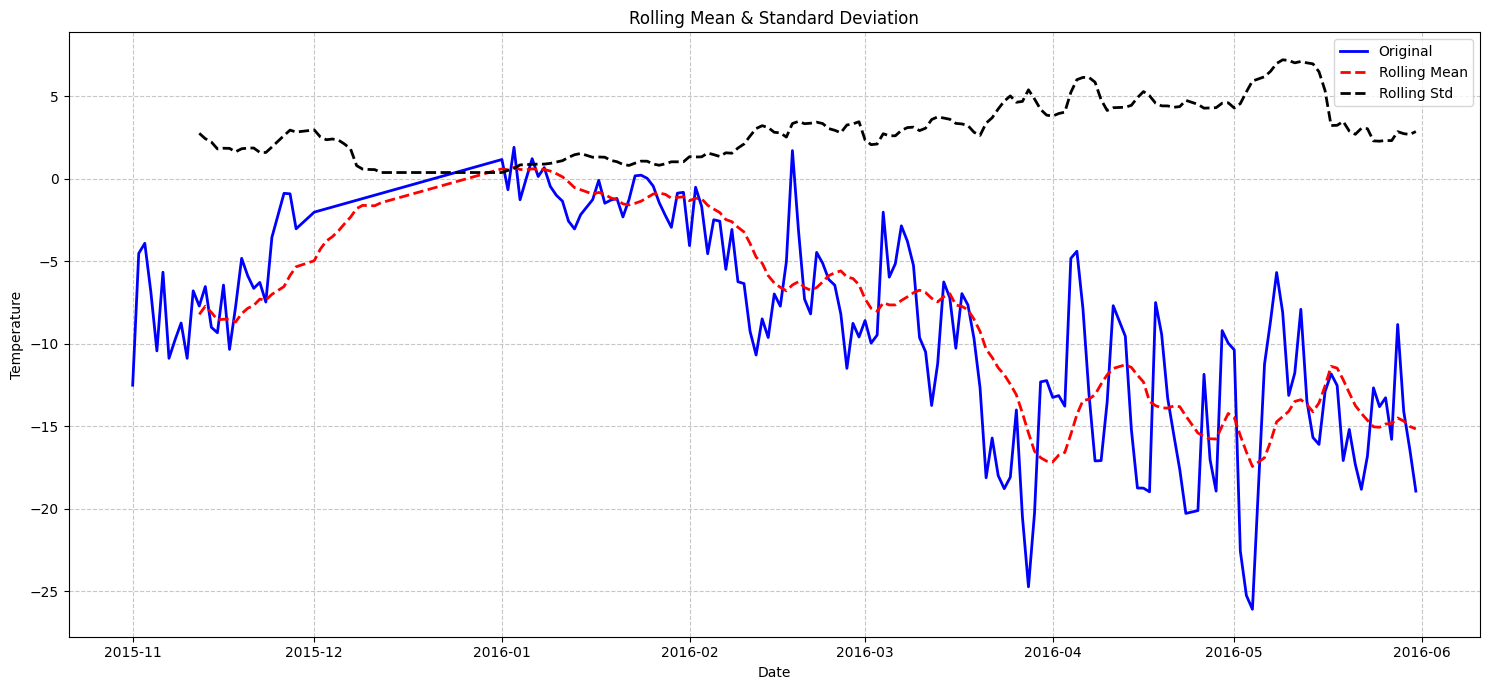

Results of Dickey-Fuller Test:
Test Statistic                 -1.32
p-value                         0.62
#Lags Used                      5.00
Number of Observations Used   200.00
Critical Value (1%)            -3.46
Critical Value (5%)            -2.88
Critical Value (10%)           -2.57
dtype: float64


In [117]:
# // utp
test_stationarity(df['tempr'])

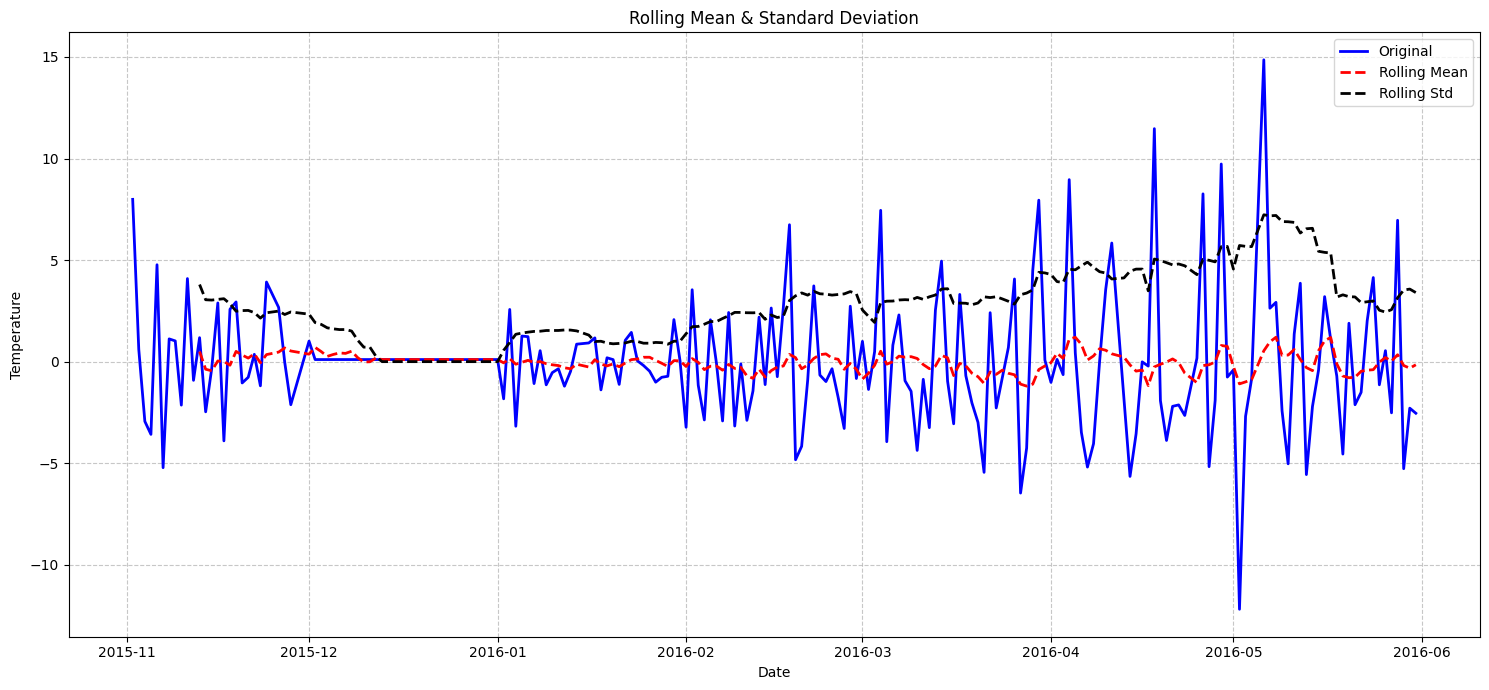

Results of Dickey-Fuller Test:
Test Statistic                 -9.96
p-value                         0.00
#Lags Used                      4.00
Number of Observations Used   200.00
Critical Value (1%)            -3.46
Critical Value (5%)            -2.88
Critical Value (10%)           -2.57
dtype: float64


In [118]:
# # // utp
df_diff = df.diff()
df_diff = df_diff.dropna()
plt.show()
test_stationarity(df_diff['tempr'])

In [119]:
# utf
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['tempr'],order = (1,0,5)) # Use the updated ARIMA class
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  tempr   No. Observations:                  206
Model:                 ARIMA(1, 0, 5)   Log Likelihood                -513.814
Date:                Fri, 06 Sep 2024   AIC                           1043.629
Time:                        23:15:35   BIC                           1070.252
Sample:                             0   HQIC                          1054.396
                                - 206                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.6007      4.858     -1.976      0.048     -19.121      -0.080
ar.L1          0.9886      0.015     65.630      0.000       0.959       1.018
ma.L1         -0.1999      0.073     -2.748      0.0

c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [127]:
from statsmodels.tsa.arima.model import ARIMA  # Updated import statement

# Ensure 'tempr' is a pandas Series
if not isinstance(df['tempr'], pd.Series):
    raise TypeError("df['tempr'] should be a pandas Series.")

# Define training and testing data
size = len(df) - 40
train, test = df['tempr'][:size], df['tempr'][size:]

print('\tARIMA MODEL: In-Sample Forecasting\n')

history = [x for x in train]
predictions = []

for t in range(len(test)):
    try:
        # Define and fit the ARIMA model
        model = ARIMA(history, order=(2, 1, 2))
        model_fit = model.fit()

        # Make forecast

        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)

        # Append the actual observation to history
        obs = test.iloc[t]
        history.append(obs)

        print(f'Predicted = {yhat:.3f}, Expected = {obs:.3f}')

    except Exception as e:
        print(f'Error at time step {t}: {e}')

# Convert predictions to a pandas Series for further analysis or visualization if needed
predictions_series = pd.Series(predictions, index=test.index)




	ARIMA MODEL: In-Sample Forecasting

Predicted = -11.925, Expected = -13.310
Predicted = -14.301, Expected = -15.510
Predicted = -15.077, Expected = -17.640
Predicted = -16.377, Expected = -20.290
Predicted = -18.459, Expected = -20.120
Predicted = -18.177, Expected = -11.860
Predicted = -11.491, Expected = -17.030
Predicted = -17.839, Expected = -18.940
Predicted = -18.440, Expected = -9.210
Predicted = -10.626, Expected = -9.970
Predicted = -12.526, Expected = -10.380
Predicted = -11.000, Expected = -22.570
Predicted = -21.522, Expected = -25.260
Predicted = -21.266, Expected = -26.100
Predicted = -22.131, Expected = -11.240
Predicted = -9.788, Expected = -8.610
Predicted = -11.806, Expected = -5.690
Predicted = -10.115, Expected = -8.110
Predicted = -12.311, Expected = -13.140
Predicted = -15.405, Expected = -11.780
Predicted = -12.205, Expected = -7.920
Predicted = -8.423, Expected = -13.480
Predicted = -14.054, Expected = -15.690
Predicted = -14.746, Expected = -16.110
Predicted =

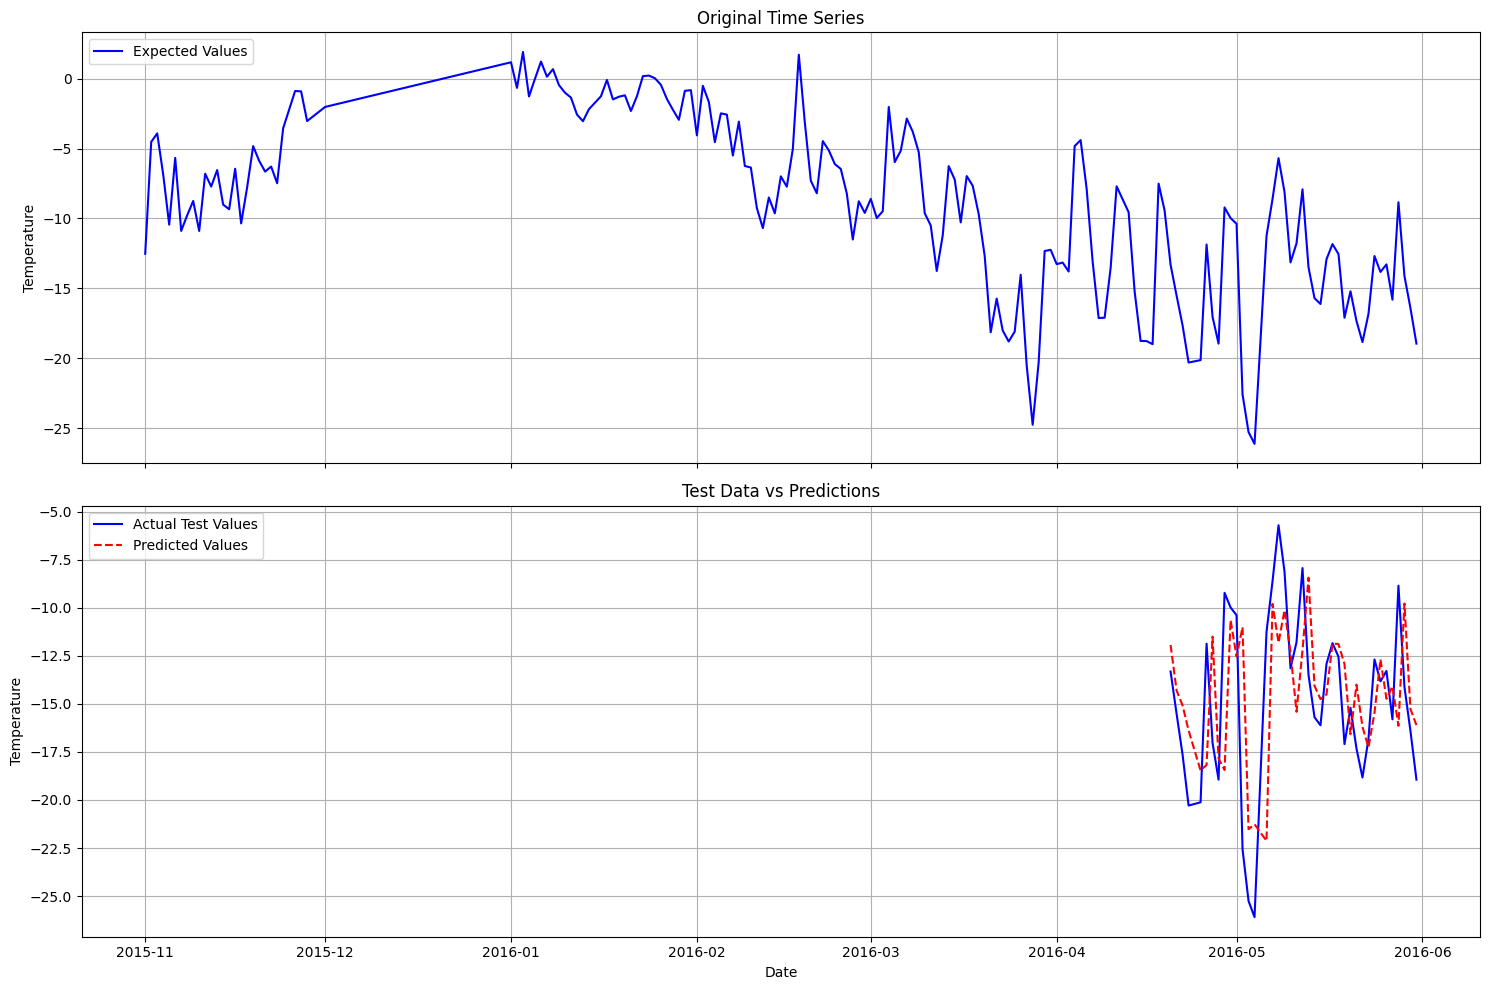

In [121]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), sharex=True)

# Plot the original time series and predictions
ax[0].plot(df.index, df['tempr'], label='Expected Values', color='blue')
ax[0].set_title('Original Time Series')
ax[0].set_ylabel('Temperature')
ax[0].legend(loc='upper left')
ax[0].grid(True)

# Plot the predictions
ax[1].plot(test.index, test, label='Actual Test Values', color='blue')
ax[1].plot(predictions_series.index, predictions_series, label='Predicted Values', color='red', linestyle='--')
ax[1].set_title('Test Data vs Predictions')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Temperature')
ax[1].legend(loc='upper left')
ax[1].grid(True)

plt.tight_layout()
plt.show()

In [122]:
# utf
# pip install plotly

#Check For Stationarity

In [123]:
def adf_test(dataset):
    """
    Perform Augmented Dickey-Fuller test on a given dataset to check for stationarity.
    
    Parameters:
    dataset (pd.Series): The time series data to test for stationarity.
    
    Returns:
    dict: A dictionary containing test results and conclusions.
    """
    # Perform Augmented Dickey-Fuller test
    dftest = adfuller(dataset, autolag='AIC')
    
    # Collect the results in a dictionary
    results = {
        "ADF Statistic": dftest[0],
        "p-value": dftest[1],
        "Number of Lags Used": dftest[2],
        "Number of Observations Used": dftest[3],
        "Critical Values": dftest[4]
    }
    
    # Print the test results
    print("Augmented Dickey-Fuller Test Results:")
    print("1. ADF Statistic:", results["ADF Statistic"])
    print("2. p-value:", results["p-value"])
    print("3. Number of Lags Used:", results["Number of Lags Used"])
    print("4. Number of Observations Used:", results["Number of Observations Used"])
    print("5. Critical Values:")
    
    for key, val in results["Critical Values"].items():
        print(f"\t{key}: {val}")
    
    # Conclusion based on p-value
    conclusion = "stationary" if dftest[1] <= 0.05 else "non-stationary"
    print(f"\nConclusion: The series is {conclusion}.")
    
    return results, conclusion

# Example usage
results, conclusion = adf_test(df['tempr'])


Augmented Dickey-Fuller Test Results:
1. ADF Statistic: -1.3176981798163407
2. p-value: 0.621036983111039
3. Number of Lags Used: 5
4. Number of Observations Used: 200
5. Critical Values:
	1%: -3.463476079125
	5%: -2.876102355
	10%: -2.574532225

Conclusion: The series is non-stationary.


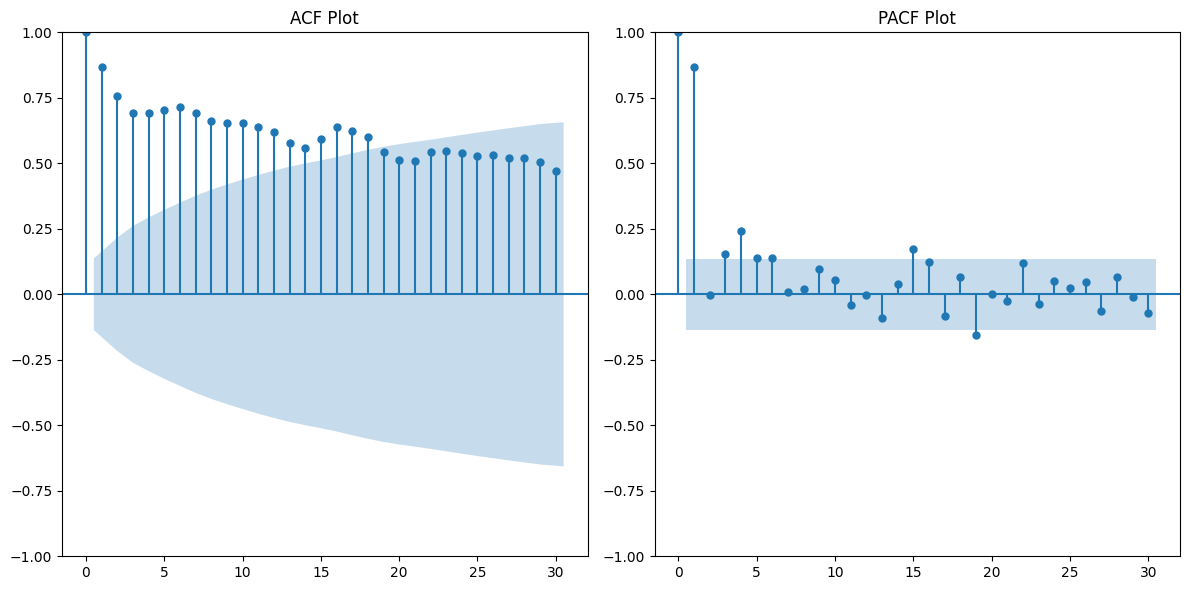

In [124]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(df['tempr'], lags=30, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(df['tempr'], lags=30, ax=plt.gca())
plt.title('PACF Plot')

plt.tight_layout()
plt.show()


In [125]:
adf_test(df['ap'])

Augmented Dickey-Fuller Test Results:
1. ADF Statistic: -5.189145999167447
2. p-value: 9.251944339534916e-06
3. Number of Lags Used: 3
4. Number of Observations Used: 202
5. Critical Values:
	1%: -3.4631437906252636
	5%: -2.8759570379821047
	10%: -2.574454682874228

Conclusion: The series is stationary.


({'ADF Statistic': -5.189145999167447,
  'p-value': 9.251944339534916e-06,
  'Number of Lags Used': 3,
  'Number of Observations Used': 202,
  'Critical Values': {'1%': -3.4631437906252636,
   '5%': -2.8759570379821047,
   '10%': -2.574454682874228}},
 'stationary')

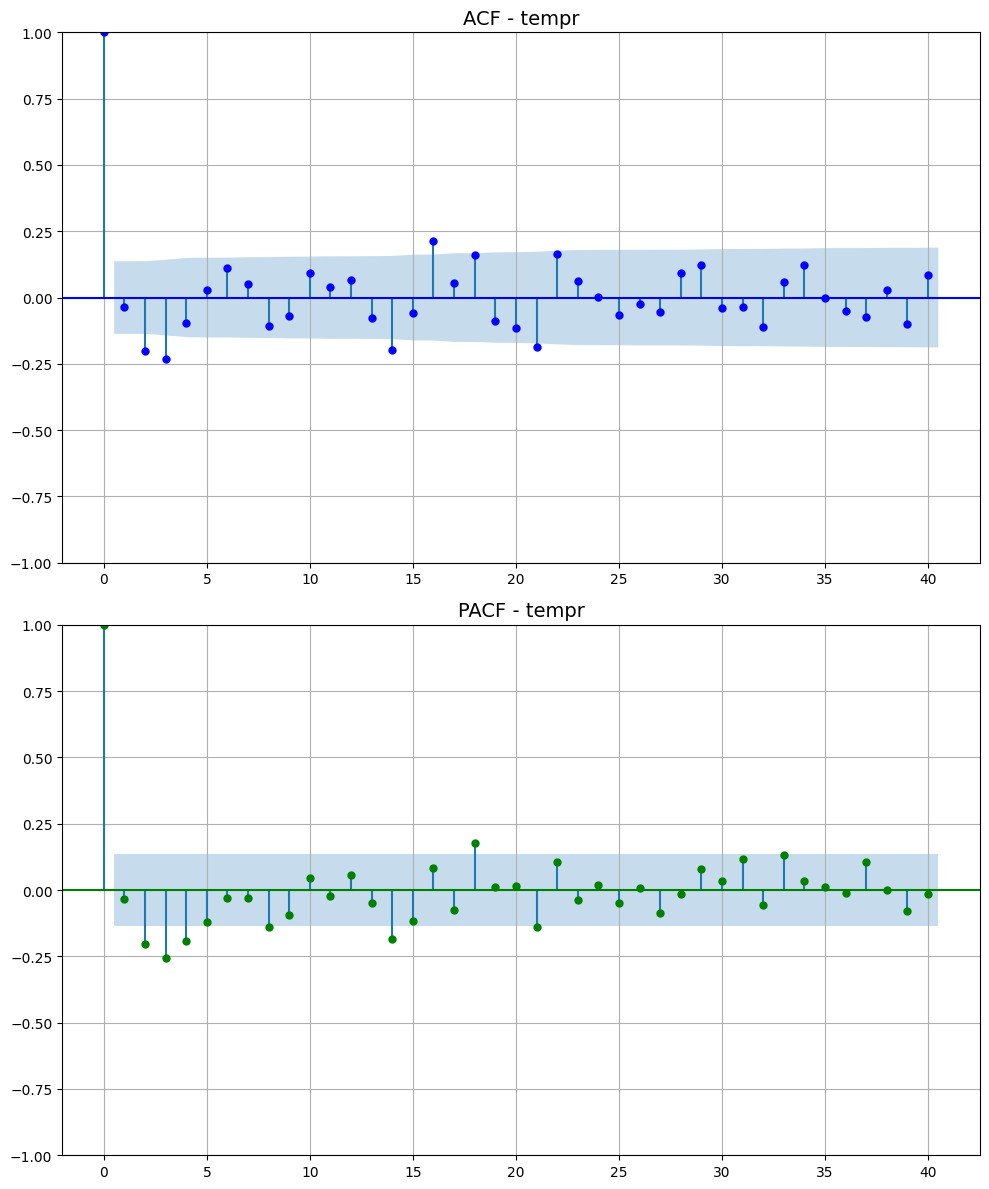

c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\0308u\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiza

ARIMA Model Summary:
                               SARIMAX Results                                
Dep. Variable:                  tempr   No. Observations:                  206
Model:                 ARIMA(4, 1, 4)   Log Likelihood                -506.832
Date:                Fri, 06 Sep 2024   AIC                           1031.665
Time:                        23:15:40   BIC                           1061.572
Sample:                             0   HQIC                          1043.761
                                - 206                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5589      0.523      2.979      0.003       0.533       2.585
ar.L2         -1.8369      0.700     -2.623      0.009      -3.209      -0.464
ar.L3          0.9313      0.73

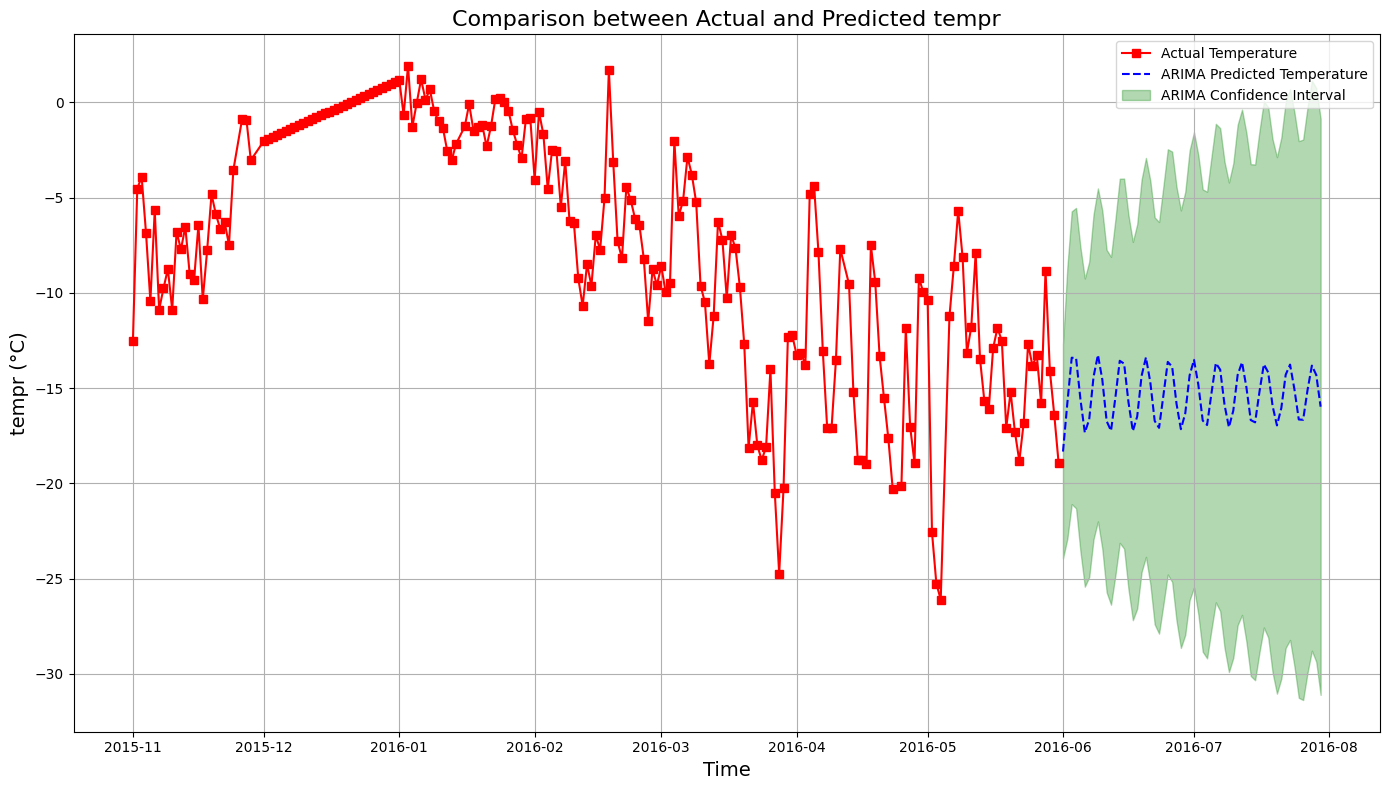

          Date  ARIMA_Predicted  ARIMA_Lower_CI  ARIMA_Upper_CI
206 2016-06-01           -18.33          -23.95          -12.72
207 2016-06-02           -15.78          -22.91           -8.66
208 2016-06-03           -13.41          -21.09           -5.73
209 2016-06-04           -13.43          -21.31           -5.55
210 2016-06-05           -15.60          -23.58           -7.62
211 2016-06-06           -17.34          -25.42           -9.25
212 2016-06-07           -16.65          -24.92           -8.38
213 2016-06-08           -14.41          -22.93           -5.89
214 2016-06-09           -13.26          -22.00           -4.52
215 2016-06-10           -14.55          -23.43           -5.67
ARIMA MSE: 22.05


In [126]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error

# Define parameters for ARIMA model
target_variable = 'tempr'
period = 30

# Step 1: Plot ACF and PACF to determine model parameters (p, q)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))

# Extract the differenced series as a 1D array
if isinstance(df_diff, pd.DataFrame):
    df_diff_series = df_diff.iloc[:, 0]  # Assume the first column if df_diff is a DataFrame
else:
    df_diff_series = df_diff.squeeze()   # Convert to 1D array if it's not already

# Plot ACF and PACF
plot_acf(df_diff_series, lags=40, ax=ax1, color='blue')
plot_pacf(df_diff_series, lags=40, ax=ax2, color='green')
ax1.set_title(f"ACF - {target_variable}", fontsize=14)
ax2.set_title(f"PACF - {target_variable}", fontsize=14)
ax1.grid(True)
ax2.grid(True)
plt.tight_layout()
plt.show()

# Step 2: Define ARIMA model parameters
p, d, q = 4, 1, 4   # Adjust these parameters based on ACF/PACF plots

try:
    # Build ARIMA model
    model_arima = ARIMA(df[target_variable], order=(p, d, q))
    model_arima_fit = model_arima.fit()

    # Step 3: Evaluate ARIMA model
    print("ARIMA Model Summary:")
    print(model_arima_fit.summary())

    # Step 4: Make predictions
    forecast_horizon = 60 # Adjust prediction length
    arima_pred = model_arima_fit.get_forecast(steps=forecast_horizon)

    # Generate predicted values and confidence intervals
    arima_pred_mean = arima_pred.predicted_mean
    arima_pred_ci = arima_pred.conf_int()

    # Create a new index for the predicted values
    future_dates = pd.date_range(df.index[-1], periods=forecast_horizon+1, freq='D')[1:]

    # Step 5: Plot actual vs. predicted values
    plt.figure(figsize=(14, 8))
    plt.plot(df[target_variable], label='Actual Temperature', marker='s', color='red')
    plt.plot(future_dates, arima_pred_mean, label='ARIMA Predicted Temperature', linestyle='--', color='blue')
    plt.fill_between(future_dates, arima_pred_ci.iloc[:, 0], arima_pred_ci.iloc[:, 1], color='green', alpha=0.3, label='ARIMA Confidence Interval')
    plt.title(f"Comparison between Actual and Predicted {target_variable}", fontsize=16)
    plt.xlabel('Time', fontsize=14)
    plt.ylabel(f"{target_variable} (°C)", fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Step 6: Tabularize the forecasted ARIMA model values
    forecast_df = pd.DataFrame({
        'Date': future_dates,
        'ARIMA_Predicted': arima_pred_mean,
        'ARIMA_Lower_CI': arima_pred_ci.iloc[:, 0],
        'ARIMA_Upper_CI': arima_pred_ci.iloc[:, 1]
    })

    print(forecast_df.head(10))  # Display the first 10 rows of the forecast

    # Step 7: Calculate Mean Squared Error (MSE)
    y_truth = df[target_variable].iloc[-forecast_horizon:]
    arima_mse = mean_squared_error(y_truth, arima_pred_mean[:len(y_truth)])
    print(f"ARIMA MSE: {arima_mse:.2f}")

except Exception as e:
    print(f"Failed to build ARIMA model. Error: {e}")
